In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv('gdp.csv')
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [3]:
missing_values = df.isnull()
missing_values.head(5)

,Country,2020,2021,2022,2023,2024,2025
0,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [4]:
x = 0
for column in missing_values.columns.values.tolist():
    print(column)
    print(missing_values[column].value_counts())
    print("")
    

Country
False    196
Name: Country, dtype: int64

2020
False    196
Name: 2020, dtype: int64

2021
False    194
True       2
Name: 2021, dtype: int64

2022
False    194
True       2
Name: 2022, dtype: int64

2023
False    194
True       2
Name: 2023, dtype: int64

2024
False    192
True       4
Name: 2024, dtype: int64

2025
False    189
True       7
Name: 2025, dtype: int64



In [5]:
df.dtypes

Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object

In [6]:
df.head()

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


In [7]:
df[['2021','2022','2023','2024','2025']] = df[['2021','2022','2023','2024','2025']].fillna(
    df[['2021','2022','2023','2024','2025']].median()
)


In [10]:
import seaborn as sns

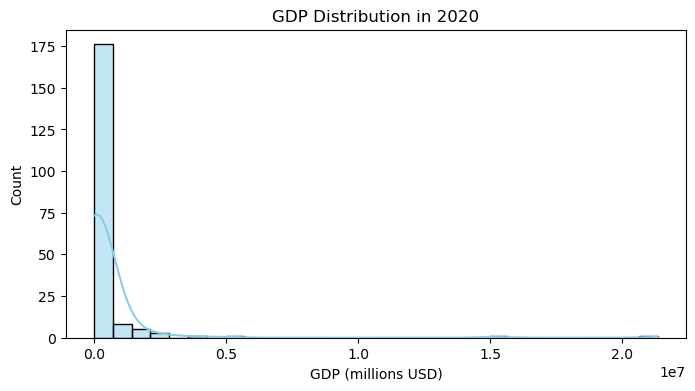

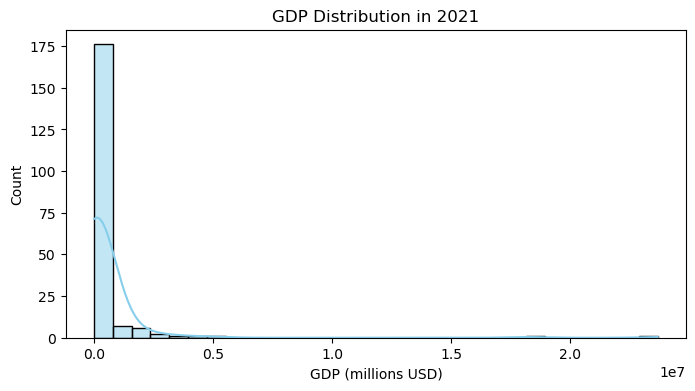

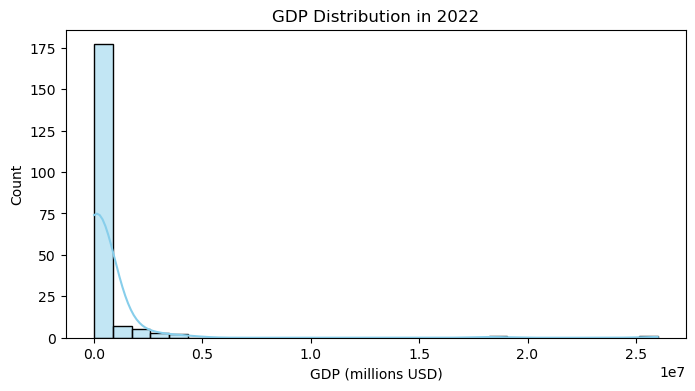

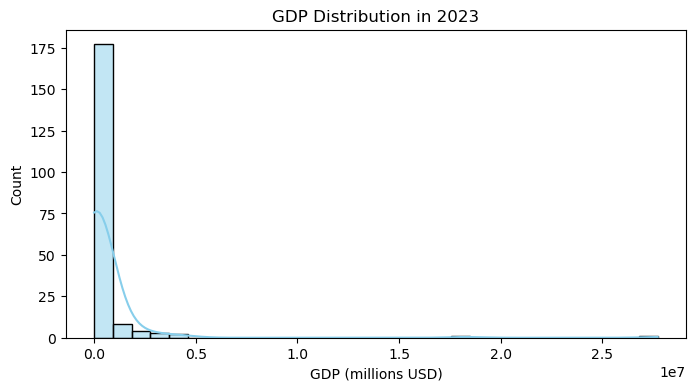

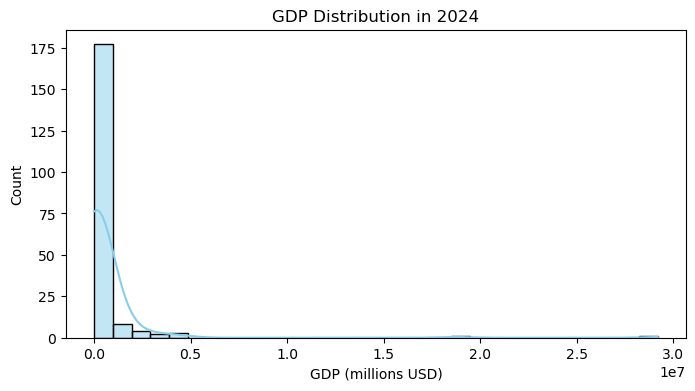

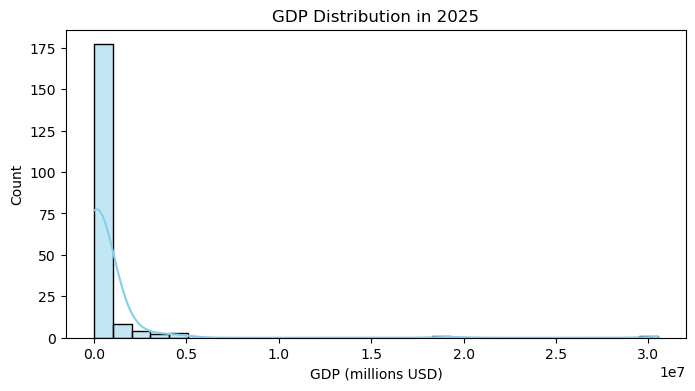

In [11]:
years = ['2020','2021','2022','2023','2024','2025']
for year in years:
    plt.figure(figsize=(8,4))
    sns.histplot(df[year], kde=True, bins=30, color='skyblue')
    plt.title(f"GDP Distribution in {year}")
    plt.xlabel("GDP (millions USD)")
    plt.show()


In [12]:
print(df.shape)

(196, 7)


d:\Rushikesh\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


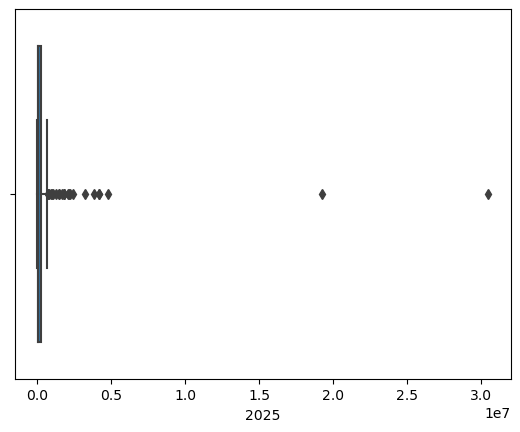

In [13]:
sns.boxplot(df[year])
plt.show()

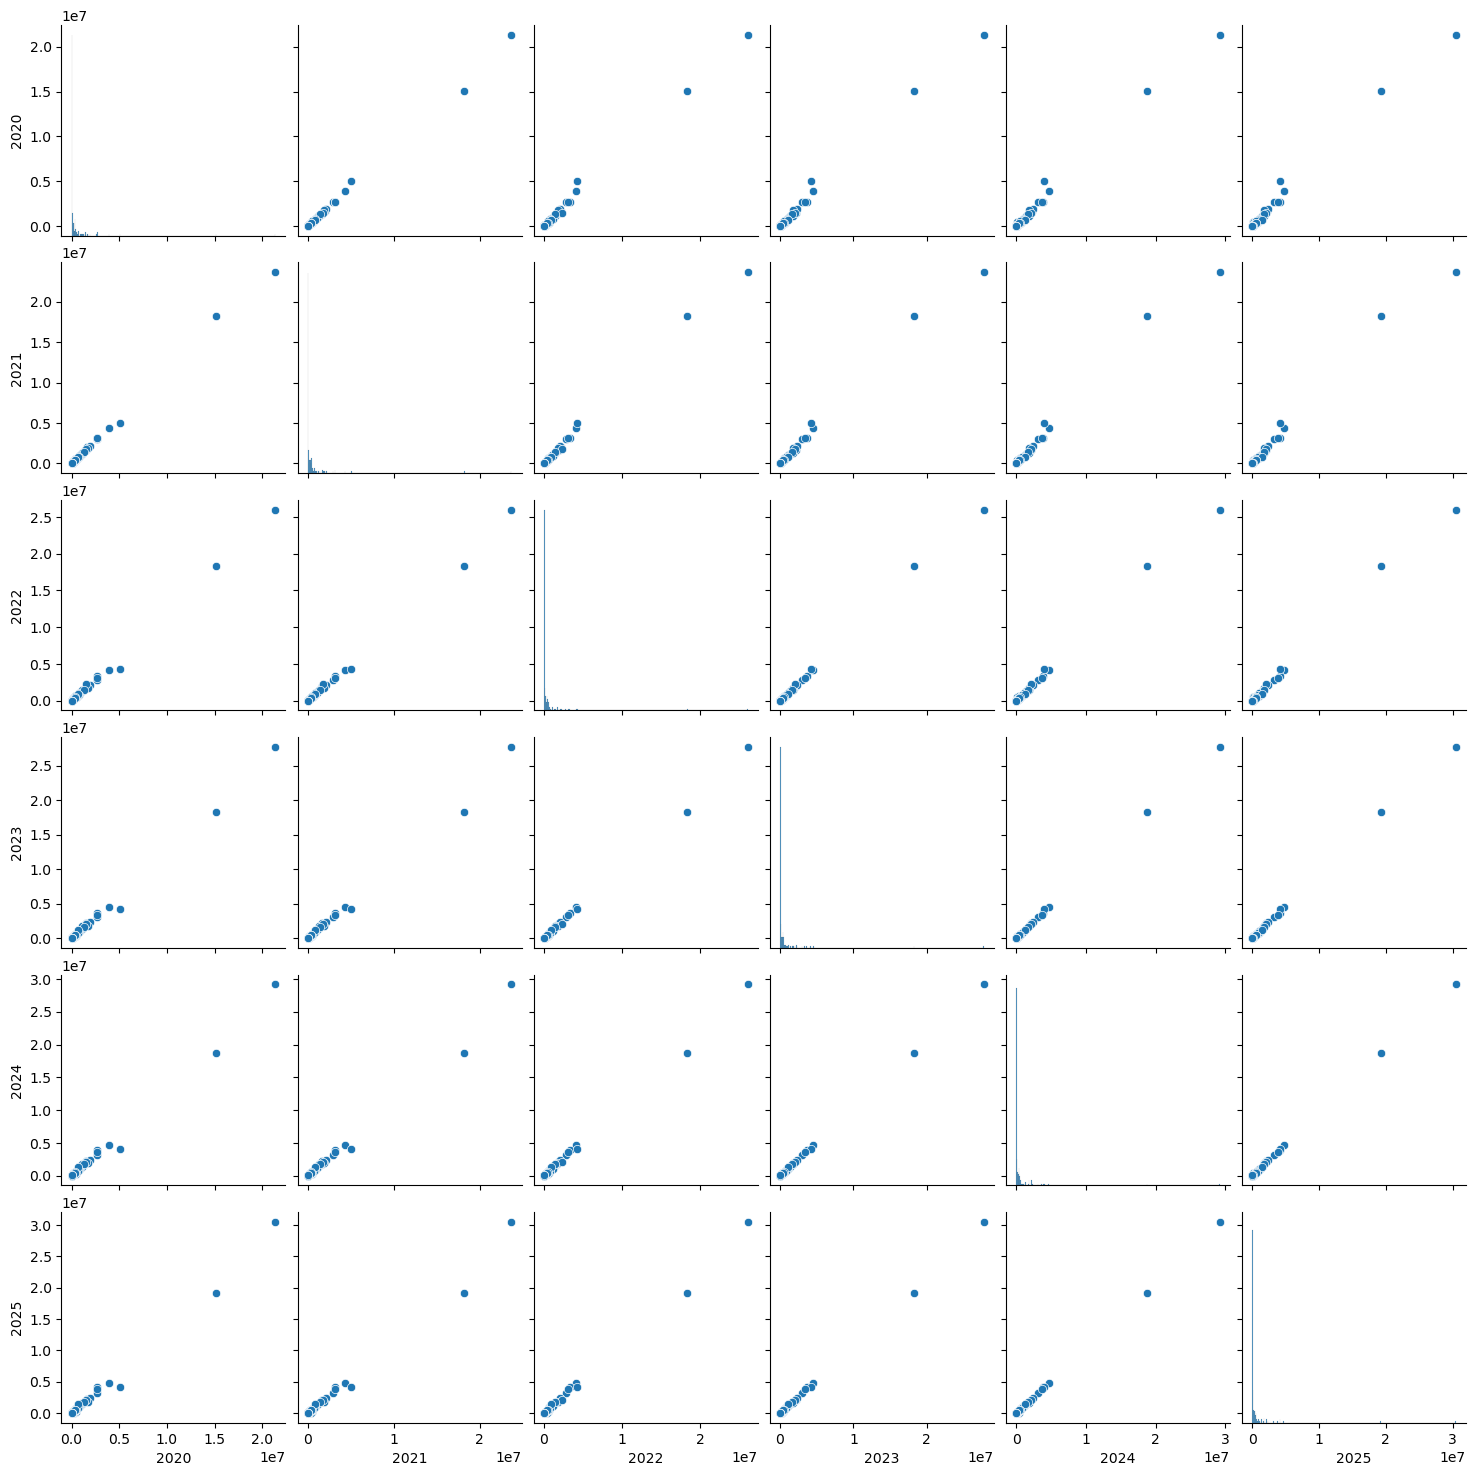

In [17]:
sns.pairplot(df[years])
plt.show()

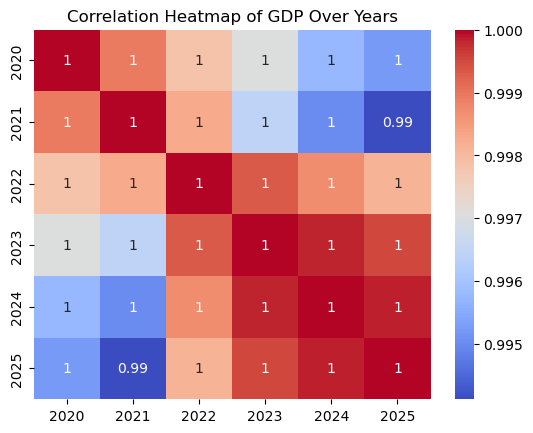

In [19]:
sns.heatmap(df[years].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of GDP Over Years")
plt.show()